<a href="https://colab.research.google.com/github/BillWorstell/BaF2_LAPPD/blob/main/SimpleOpticsPhotons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def IdealBaF2(X, Y, Z, T, N, Index, ReflectX, ReflectY, ReflectZ):
    pass


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cm

!pip install icecream
from icecream import ic

In [3]:
import scipy
print(scipy.__version__)

1.11.3


In [4]:
!python --version

Python 3.10.12


In [5]:
# Isotopic Emission from this point – origin at geometric center of MiniBlock
# CallSimpleOpticsPhotons = Script to generate photon lists
#
#X=-10.5
#X=-7.5
#X=-4.5
#X=-1.5
X= 1.5
#X= 4.5
#X= 7.5
#X=10.5
#Y=11.0
#Y=9.0
#Y=7.0
#Y=5.0
#Y=3.0
#Y=1.0
#Y=-1.0
Y=-3.0
#Y=-5.0
#Y=-7.0
#Y=-9.0
#Y=-11.0
Z=0.
#Z=-(45./2.)+5.
#Z=-(45./2.)+10.
#Z=-(45./2.)+15.
#Z=-(45./2.)+20.
#Z=-(45./2.)+25.
#Z=-(45./2.)+30.
#Z=-(45./2.)+35.
#Z=-(45./2.)+40.

#Number of photons to generate (511 keV x ideal photosensor)
#NFast=172.
NFast=10000
NSlow=1059.
# Switch to either have random or fixed distribution of emission angles
RandomAngles=False
# Index of refraction for optical barriers
#  (Air and LIOB=Laser Induced Optical Barrier)
IndexX=1.0
IndexY=1.40
# Index of refraction for fast and slow component
IndexFastBaF2=1.55
IndexSlowBaF2=1.50
# Reflectivity of mirrored surfaces
ReflectX=0.90
ReflectY=0.90
ReflectZ=0.90

In [6]:
print("X=",X)
print("Y=",Y)
print("Z=",Z)
print("NFast=",NFast)
print("NSlow=",NSlow)

X= 1.5
Y= -3.0
Z= 0.0
NFast= 10000
NSlow= 1059.0


In [7]:
#Constant Geometry Parameters
DZ = 45. #mm
DetectNX = 8
dX = 3.0  #mm
DX = DetectNX * dX
XBins=np.arange(-DX/2.,DX/2.,dX)+(dX/2.)
print(XBins)
DetectNY = 12;
dY = 2.0; #mm
DY = DetectNY  * dY
YBins=np.arange(-DY/2.,DY/2.,dY)+(dY/2.)
print(YBins)
TMax=1000. #Maximum Time in ps

[-10.5  -7.5  -4.5  -1.5   1.5   4.5   7.5  10.5]
[-11.  -9.  -7.  -5.  -3.  -1.   1.   3.   5.   7.   9.  11.]


NBins= 100
CosZBins.shape (100,)
PhiBins.shape (100,)


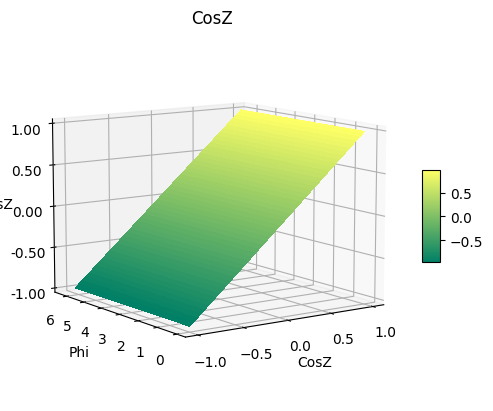

In [8]:
photon_passes = {'Fast': (NFast, IndexFastBaF2), 'Slow': (NSlow, IndexSlowBaF2)}

#for iPhotonPass in ['Fast','Slow']:
for iPhotonPass in ['Fast']:
    NPEs, Index = photon_passes[iPhotonPass]
    NEmit = NPEs
    CMMPerPs = 0.3/Index
    SqrtNPEs = np.sqrt(NPEs)
    if (~RandomAngles):
      # Fixed isotropic distribution
      NBins=np.ceil(SqrtNPEs)
      NBins=int(np.round(2.*(np.ceil(NBins/2.))))
      dCosZ=2./NBins
      dPhi=(2.*np.pi)/NBins
      CosZBins=np.arange(-1.+(dCosZ/2.),1.,dCosZ)
      PhiBins=np.arange(0.+(dPhi/2.),2.*np.pi,dPhi)

print("NBins=",NBins)
print("CosZBins.shape",CosZBins.shape)
print("PhiBins.shape",PhiBins.shape)

XX, YY = np.meshgrid(CosZBins, PhiBins)

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XX, YY, XX, cmap="summer",
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Set the axis labels
ax.set_title('CosZ')
ax.set_xlabel('CosZ')
ax.set_ylabel('Phi')
ax.set_zlabel('CosZ')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.25, aspect=5)
ax.view_init(elev=10, azim=235, roll=0)

plt.show()

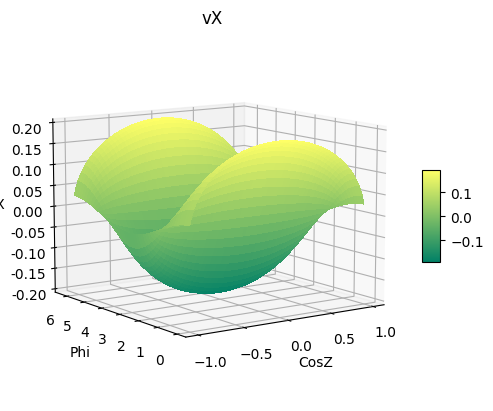

In [9]:
XX, YY = np.meshgrid(CosZBins, PhiBins)
R = np.sqrt(1.-np.square(XX))
vX = CMMPerPs * R * np.cos(YY)

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XX, YY, vX, cmap="summer",
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Set the axis labels
ax.set_title('vX')
ax.set_xlabel('CosZ')
ax.set_ylabel('Phi')
ax.set_zlabel('vX')
ax.set_zlim(-0.2,0.2)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.25, aspect=5)
ax.view_init(elev=10, azim=235, roll=0)

plt.show()

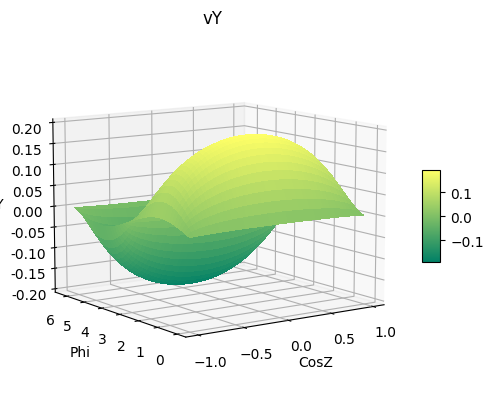

In [10]:
XX, YY = np.meshgrid(CosZBins, PhiBins)

R = np.sqrt(1.-XX**2)
vZ = CMMPerPs * XX
SinTheta=np.sqrt(1.-np.square(XX))
SinTheta=np.where(vZ>0,SinTheta,-1.*SinTheta)
SinPhi=np.sin(XX)

vY = CMMPerPs * R * np.sin(YY)

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XX, YY, vY, cmap="summer",
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Set the axis labels
ax.set_title('vY')
ax.set_xlabel('CosZ')
ax.set_ylabel('Phi')
ax.set_zlabel('vY')
ax.set_zlim(-0.2,0.2)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.25, aspect=5)
ax.view_init(elev=10, azim=235, roll=0)

plt.show()

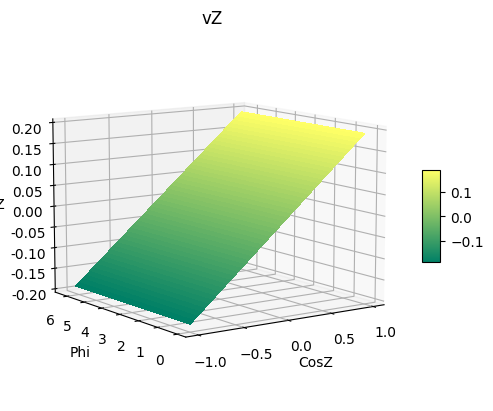

In [11]:
XX, YY = np.meshgrid(CosZBins, PhiBins)

#R = np.sqrt(1.-XX**2)
vZ = CMMPerPs * XX

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XX, YY, vZ, cmap="summer",
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Set the axis labels
ax.set_title('vZ')
ax.set_xlabel('CosZ')
ax.set_ylabel('Phi')
ax.set_zlabel('vZ')
ax.set_zlim(-0.2,0.2)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.25, aspect=5)
ax.view_init(elev=10, azim=235, roll=0)

plt.show()

In [12]:
#Clip to remove division by zero
vZ=np.where(np.abs(vZ)>0.0000001,vZ,0.0000001)

TTop=np.divide(((2.*DZ)-(DZ/2.)-Z),vZ)
TBottom=np.divide(((0.*DZ)-(DZ/2.)-Z),vZ)
TCollect=np.maximum(TTop,TBottom)
VXCollect=X+np.multiply(vX,TCollect)
VYCollect=Y+np.multiply(vY,TCollect)

print("TCollect.shape=",TCollect.shape)
TCollect=np.maximum(0.000001,TCollect)
TCollect=np.minimum(TMax,TCollect)
print("np.median(TCollect)=",np.median(TCollect))
print("np.amin(TCollect)=",np.amin(TCollect))
print("np.amax(TCollect)=",np.amax(TCollect))

TCollect.shape= (100, 100)
np.median(TCollect)= 465.0000000000002
np.amin(TCollect)= 117.42424242424242
np.amax(TCollect)= 1000.0


In [13]:
print("X=",X)
print("Y=",Y)
print("Z=",Z)
print("NFast=",NFast)
print("NSlow=",NSlow)

X= 1.5
Y= -3.0
Z= 0.0
NFast= 10000
NSlow= 1059.0


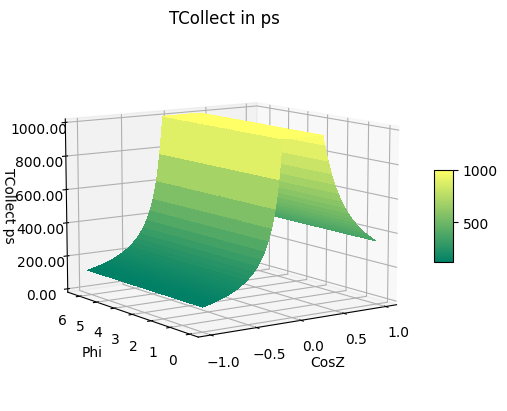

In [14]:
XX, YY = np.meshgrid(CosZBins, PhiBins)

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XX, YY, TCollect, cmap="summer",
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Set the axis labels
ax.set_title('TCollect in ps')
ax.set_xlabel('CosZ')
ax.set_ylabel('Phi')
ax.set_zlabel('TCollect ps')
ax.set_zlim(0.,TMax)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.25, aspect=5)
ax.view_init(elev=10, azim=235, roll=0)

plt.show()

In [15]:
XX, YY = np.meshgrid(CosZBins, PhiBins)
SinTheta=XX

photon_passes = {'Fast': (NFast, IndexFastBaF2), 'Slow': (NSlow, IndexSlowBaF2)}
for iPhotonPass in ['Fast']:
  NPEs, Index = photon_passes[iPhotonPass]
  print("NPEs=",NPEs)
  print("SinTheta.shape",SinTheta.shape)

NPEs= 10000
SinTheta.shape (100, 100)


In [16]:
photon_passes = {'Fast': (NFast, IndexFastBaF2), 'Slow': (NSlow, IndexSlowBaF2)}
for iPhotonPass in ['Fast']:
  NPEs, Index = photon_passes[iPhotonPass]
  # Calculate critical angle for total internal reflection at interface
  SinThetaCriticalX=IndexX/Index
  SinThetaCriticalY=IndexY/Index

  # Set up data structures for 6 different reflection type cases
  # depending on signs of VX, VY, snf vZ. Indices of medium and reflector then
  # provide critical angle for this reflection to be total internal
  #
  # Condition for total internal reflection off X or Y planes
  TIRX=np.abs(SinTheta)>np.abs(SinThetaCriticalX)
  TIRY=np.abs(SinTheta)>np.abs(SinThetaCriticalY)
  #
  #Distance between reflections
  DReflectX=np.where(TIRX,dX,DX)
  DReflectY=np.where(TIRY,dY,DY)
  #
  #Unfold hall of mirrors into virtual detector
  # Virtual detector collection ray lengths
  DVXCollect=np.abs(vX)*TCollect
  DVYCollect=np.abs(vY)*TCollect
  # Number Reflections
  NXReflect=np.floor(DVXCollect/DReflectX)
  NYReflect=np.floor(DVYCollect/DReflectY)

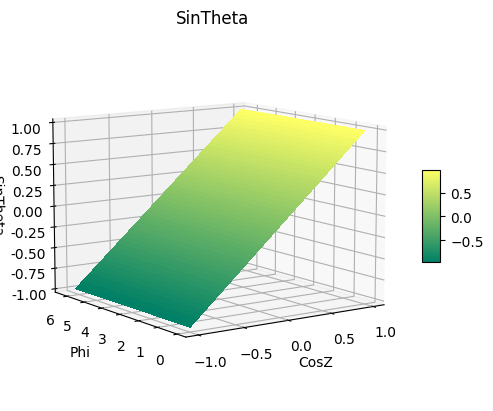

In [17]:
XX, YY = np.meshgrid(CosZBins, PhiBins)

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XX, YY, SinTheta, cmap="summer",
                       linewidth=0, antialiased=False)

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Set the axis labels
ax.set_title('SinTheta')
ax.set_xlabel('CosZ')
ax.set_ylabel('Phi')
ax.set_zlabel('SinTheta')
ax.set_zlim(-1.0,1.0)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.25, aspect=5)
ax.view_init(elev=10, azim=235, roll=0)

plt.show()

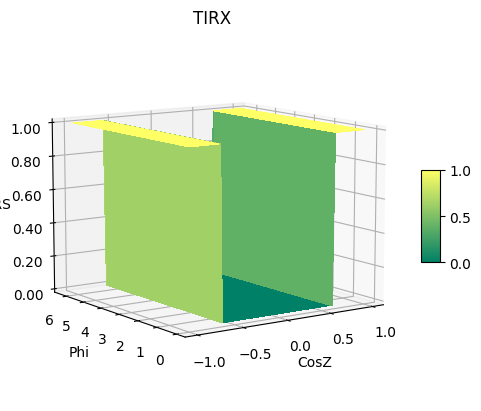

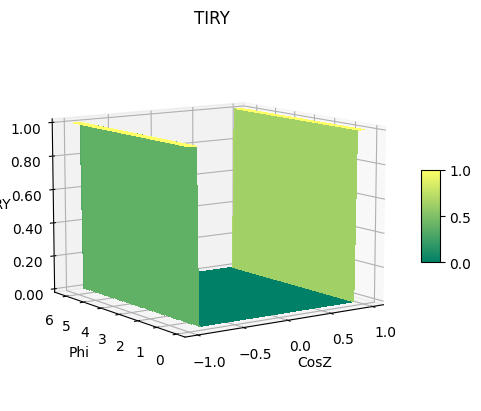

In [18]:
XX, YY = np.meshgrid(CosZBins, PhiBins)

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XX, YY, TIRX, cmap="summer",
                       linewidth=0, antialiased=False)

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Set the axis labels
ax.set_title('TIRX')
ax.set_xlabel('CosZ')
ax.set_ylabel('Phi')
ax.set_zlabel('TIRS')
ax.set_zlim(0.,1.0)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.25, aspect=5)
ax.view_init(elev=10, azim=235, roll=0)

plt.show()

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XX, YY, TIRY, cmap="summer",
                       linewidth=0, antialiased=False)

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Set the axis labels
ax.set_title('TIRY')
ax.set_xlabel('CosZ')
ax.set_ylabel('Phi')
ax.set_zlabel('TIRY')
ax.set_zlim(0.,1.0)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.25, aspect=5)
ax.view_init(elev=10, azim=235, roll=0)

plt.show()

In [19]:
photon_passes = {'Fast': (NFast, IndexFastBaF2), 'Slow': (NSlow, IndexSlowBaF2)}
for iPhotonPass in ['Fast']:
  NPEs, Index = photon_passes[iPhotonPass]
  # Calculate critical angle for total internal reflection at interface
  SinThetaCriticalX=IndexX/Index
  SinThetaCriticalY=IndexY/Index

  # Set up data structures for 6 different reflection type cases
  # depending on signs of VX, VY, snf vZ. Indices of medium and reflector then
  # provide critical angle for this reflection to be total internal
  #
  # Condition for total internal reflection off X or Y planes
  TIRX=np.abs(SinTheta)>np.abs(SinThetaCriticalX)
  TIRY=np.abs(SinTheta)>np.abs(SinThetaCriticalY)
  #
  #Distance between reflections
  DReflectX=np.where(TIRX,dX,DX)
  DReflectY=np.where(TIRY,dY,DY)
  #
  #Unfold hall of mirrors into virtual detector
  # Virtual detector collection ray lengths
  DVXCollect=np.abs(vX)*TCollect
  DVYCollect=np.abs(vY)*TCollect
  #
  # Number Reflections resulting in complete transits of unit cell
  NXReflect=np.floor(DVXCollect/DReflectX)
  NYReflect=np.floor(DVYCollect/DReflectY)
  #
  # Local emission coordinates within unit cell with origin at cell center
  X0=np.remainder(X+(DX/2.),DReflectX)-(DX/2.)
  Y0=np.remainder(Y+(DY/2.),DReflectY)-(DY/2.)
  #
  # Check whether first reflection is before being detected
  TFirstX=np.where(vX>0,np.divide((DReflectX/2.)-X0,vX),np.divide(X0-(DReflectX/2.),vX))
  TFirstY=np.where(vY>0,np.divide((DReflectY/2.)-Y0,vY),np.divide(Y0-(DReflectY/2.),vY))
  # If there is a reflection before detection, increment the Reflection counter
  NXReflect=np.where(TCollect<TFirstX,NXReflect,NXReflect+1)
  NYReflect=np.where(TCollect<TFirstY,NYReflect,NYReflect+1)
  #
  # Get Reflection Survival Probability
  # Reflectivity of mirrored surfaces
  # ReflectX=0.90
  # ReflectY=0.90
  # ReflectZ=0.90
  SurviveXReflect=np.where(TIRX,1.,np.power(ReflectX,NXReflect))
  SurviveYReflect=np.where(TIRY,1.,np.power(ReflectY,NYReflect))
  SurviveZReflect=np.where(vZ>0,ReflectZ,1.)
  SurviveReflect=np.multiply(np.multiply(SurviveXReflect,SurviveYReflect),SurviveZReflect)

In [20]:
print("X=",X)
print("Y=",Y)
print("Z=",Z)
print("MeanSurvive= " + str(SurviveReflect.mean()))

X= 1.5
Y= -3.0
Z= 0.0
MeanSurvive= 0.6156605538735891


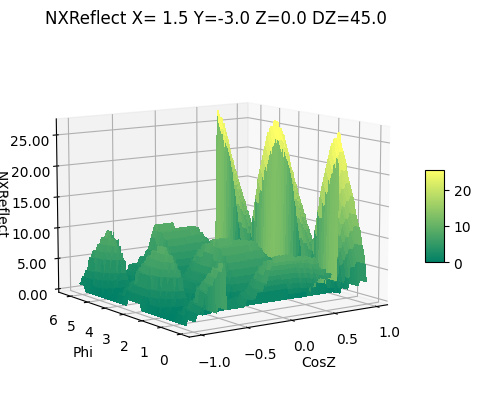

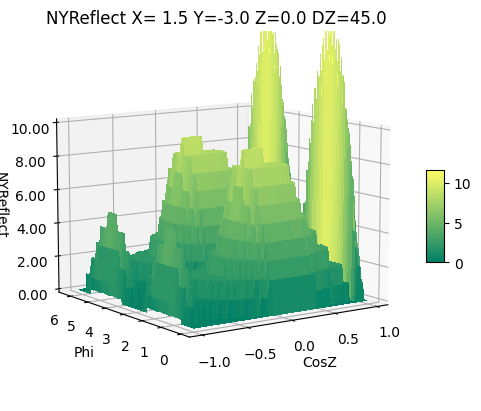

In [21]:
XX, YY = np.meshgrid(CosZBins, PhiBins)

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XX, YY, np.minimum(100,NXReflect), cmap="summer",
                       linewidth=0, antialiased=False)

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Set the axis labels
#ax.set_title('NXReflect')
ax.set_title("NXReflect X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )

ax.set_xlabel('CosZ')
ax.set_ylabel('Phi')
ax.set_zlabel('NXReflect')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.25, aspect=5)
ax.view_init(elev=10, azim=235, roll=0)

plt.show()

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XX, YY, np.minimum(50,NYReflect), cmap="summer",
                       linewidth=0, antialiased=False)

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Set the axis labels
#ax.set_title('NYReflect')
ax.set_title("NYReflect X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
ax.set_xlabel('CosZ')
ax.set_ylabel('Phi')
ax.set_zlabel('NYReflect')
ax.set_zlim(0.,10)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.25, aspect=5)
ax.view_init(elev=10, azim=235, roll=0)

plt.show()

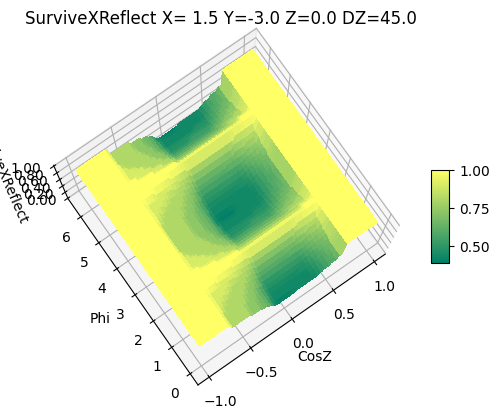

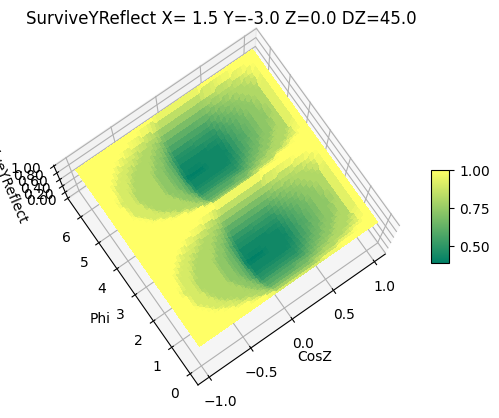

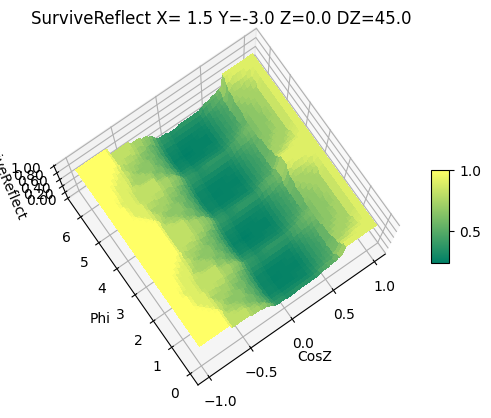

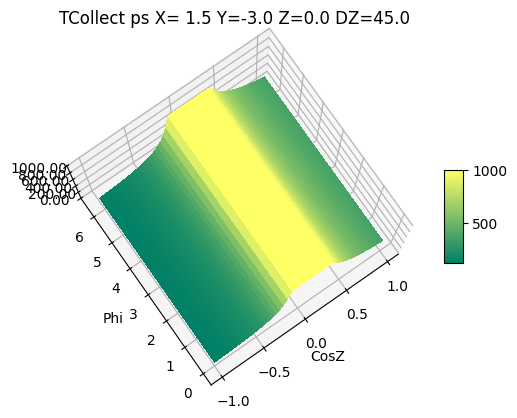

In [22]:
XX, YY = np.meshgrid(CosZBins, PhiBins)

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XX, YY, SurviveXReflect, cmap="summer",
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Set the axis labels
#ax.set_title('SurviveXReflect')
ax.set_title("SurviveXReflect X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
ax.set_xlabel('CosZ')
ax.set_ylabel('Phi')
ax.set_zlabel('SurviveXReflect')

# Add a color bar which maps values to colors.
#ax.view_init(elev=10, azim=235, roll=0)
ax.view_init(elev=80, azim=235, roll=0)
ax.set_zlim(0.,1.)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.25, aspect=5)

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XX, YY, SurviveYReflect, cmap="summer",
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Set the axis labels
ax.set_title("SurviveYReflect X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
#ax.set_title('SurviveYReflect')
ax.set_xlabel('CosZ')
ax.set_ylabel('Phi')
ax.set_zlabel('SurviveYReflect')

# Add a color bar which maps values to colors.
#ax.view_init(elev=10, azim=235, roll=0)
ax.view_init(elev=80, azim=235, roll=0)
ax.set_zlim(0.,1.)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.25, aspect=5)

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XX, YY, SurviveReflect, cmap="summer",
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Set the axis labels
#ax.set_title('SurviveReflect')
ax.set_title("SurviveReflect X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
ax.set_xlabel('CosZ')
ax.set_ylabel('Phi')
ax.set_zlabel('SurviveReflect')

# Add a color bar which maps values to colors.
#ax.view_init(elev=10, azim=235, roll=0)
ax.view_init(elev=80, azim=235, roll=0)
ax.set_zlim(0.,1.)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.25, aspect=5)

#Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XX, YY, np.minimum(TMax,TCollect), cmap="summer",
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_xlabel('CosZ')
ax.set_ylabel('Phi')
#ax.set_zlabel('TCollect ps')
ax.set_title("TCollect ps X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )

# Add a color bar which maps values to colors.
#ax.view_init(elev=10, azim=235, roll=0)
ax.view_init(elev=80, azim=235, roll=0)
ax.set_zlim(0.,TMax)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.25, aspect=5)

plt.show()

In [23]:
# Print out central test case
TestCosZ=25
TestPhi=99


print("TCollect[TestPhi,TestCosZ]=",TCollect[TestPhi,TestCosZ])
#
print("X=",X)
print("Y=",Y)
print("Z=",Z)
#
# XX, YY = np.meshgrid(CosZBins, PhiBins)
print("XX.shape=",XX.shape)
print("TestCosZ=",TestCosZ)
print("TestPhi=",TestPhi)
print("vX[TestPhi,TestCosZ]=",vX[TestPhi,TestCosZ])
print("vY[TestPhi,TestCosZ]=",vY[TestPhi,TestCosZ])
print("vZ[TestPhi,TestCosZ]=",vZ[TestPhi,TestCosZ])
#
photon_passes = {'Fast': (NFast, IndexFastBaF2), 'Slow': (NSlow, IndexSlowBaF2)}
for iPhotonPass in ['Fast']:
  NPEs, Index = photon_passes[iPhotonPass]
  print("NPEs=",NPEs)
  print("Index=",Index)
  # Calculate critical angle for total internal reflection at interface
  SinThetaCriticalX=IndexX/Index
  print("SinThetaCriticalX=",SinThetaCriticalX)
  SinThetaCriticalY=IndexY/Index
  print("SinThetaCriticalY=",SinThetaCriticalY)
  # Set up data structures for 6 different reflection type cases
  # depending on signs of VX, VY, snf vZ. Indices of medium and reflector then
  # provide critical angle for this reflection to be total internal
  #
  # Condition for total internal reflection off X or Y planes
  TIRX=np.abs(SinTheta)>np.abs(SinThetaCriticalX)
  TIRY=np.abs(SinTheta)>np.abs(SinThetaCriticalY)
  print("TIRX[TestPhi,TestCosZ]=",TIRX[TestPhi,TestCosZ])
  print("TIRY[TestPhi,TestCosZ]=",TIRY[TestPhi,TestCosZ])
  #
  #Distance between reflections
  DReflectX=np.where(TIRX,dX,DX)
  DReflectY=np.where(TIRY,dY,DY)
  print("DReflectX[TestPhi,TestCosZ]=",DReflectX[TestPhi,TestCosZ])
  print("DReflectY[TestPhi,TestCosZ]=",DReflectY[TestPhi,TestCosZ])
  # #
  #Unfold hall of mirrors into virtual detector
  # Virtual detector collection ray lengths
  DVXCollect=np.abs(vX)*TCollect
  DVYCollect=np.abs(vY)*TCollect
  print("DVXCollect[TestPhi,TestCosZ]=",DVXCollect[TestPhi,TestCosZ])
  print("DVYCollect[TestPhi,TestCosZ]=",DVYCollect[TestPhi,TestCosZ])
  #
  # Find Collection coordinates in virtual detector
  VXDetect=X + np.multiply(TCollect,vX)
  VYDetect=Y + np.multiply(TCollect,vY)
  print("VXDetect[TestPhi,TestCosZ]=",VXDetect[TestPhi,TestCosZ])
  print("VYDetect[TestPhi,TestCosZ]=",VYDetect[TestPhi,TestCosZ])
  #
  # Get offset of virtual detection position unit cell center
  OffsetX=np.where(vX>0,np.remainder(VXDetect+(DX/2),DReflectX)-(DReflectX/2),-np.remainder(-VXDetect+(DReflectX/2),DReflectX)+(DReflectX/2))
  OffsetY=np.where(vY>0,np.remainder(VYDetect+(DY/2),DReflectY)-(DReflectY/2),-np.remainder(-VYDetect+(DReflectY/2),DReflectY)+(DReflectY/2))
  print("OffsetX[TestPhi,TestCosZ]=",OffsetX[TestPhi,TestCosZ])
  print("OffsetY[TestPhi,TestCosZ]=",OffsetY[TestPhi,TestCosZ])
  #
  # Get offset of virtual detection point within unit cell
  XOffset=np.where(VXDetect>0,DReflectX*np.floor_divide(VXDetect,DReflectX),DReflectX*np.floor_divide(-VXDetect,DReflectX))
  YOffset=np.where(VYDetect>0,DReflectY*np.floor_divide(VYDetect,DReflectY),DReflectY*np.floor_divide(-VYDetect,DReflectY))
  print("XOffset[TestPhi,TestCosZ]=",XOffset[TestPhi,TestCosZ])
  print("YOffset[TestPhi,TestCosZ]=",YOffset[TestPhi,TestCosZ])
  #
  # Check whether first reflection is before being detected
  TFirstX=np.empty(vX.shape,dtype=float)
  TFirstY=np.empty(vY.shape,dtype=float)
  TFirstX=np.where(np.multiply(vX>0,~TIRX),np.divide((DX/2.)-X,vX),TFirstX)
  TFirstX=np.where(np.multiply(vX<0,~TIRX),np.divide(X-(DX/2.),vX),TFirstX)
  TFirstX=np.where(np.multiply(vX>0, TIRX),np.divide((dX/2.)-(X-XOffset),vX),TFirstX)
  TFirstX=np.where(np.multiply(vX<0, TIRX),np.divide((XOffset-X)-(dX/2.),vX),TFirstX)
  TFirstY=np.where(np.multiply(vY>0,~TIRY),np.divide((DY/2.)-Y,vY),TFirstY)
  TFirstY=np.where(np.multiply(vY<0,~TIRY),np.divide(Y-(DY/2.),vY),TFirstY)
  TFirstY=np.where(np.multiply(vY>0, TIRY),np.divide((dY/2.)-(Y-YOffset),vY),TFirstY)
  TFirstY=np.where(np.multiply(vY<0, TIRY),np.divide((YOffset-Y)-(dY/2.),vY),TFirstY)
  print("TFirstX[TestPhi,TestCosZ]=",TFirstX[TestPhi,TestCosZ])
  print("TFirstY[TestPhi,TestCosZ]=",TFirstY[TestPhi,TestCosZ])
  #
  # Number Reflections resulting in complete transits of unit cell
  NXWallToWall=np.floor(DVXCollect/DReflectX)
  NYWallToWall=np.floor(DVYCollect/DReflectY)
  #
  # Get time for traversal of all wall-to-wall reflection pairs
  TXWallToWall=np.divide(np.multiply(DReflectX,NXWallToWall),np.abs(vX))
  TYWallToWall=np.divide(np.multiply(DReflectY,NYWallToWall),np.abs(vY))
  print("TXWallToWall[TestPhi,TestCosZ]=",TXWallToWall[TestPhi,TestCosZ])
  print("TYWallToWall[TestPhi,TestCosZ]=",TYWallToWall[TestPhi,TestCosZ])
  #
  # Check time of first reflection
  NXWalltoWall=np.where(TCollect<TFirstX,0,NXWallToWall)
  NYWallToWall=np.where(TCollect<TFirstY,0,NYWallToWall)
  TLastX=np.where(TCollect<TFirstX,0,TFirstX+TXWallToWall)
  TLastY=np.where(TCollect<TFirstY,0,TFirstY+TYWallToWall)
  print("TLastX[TestPhi,TestCosZ]=",TLastX[TestPhi,TestCosZ])
  print("TLastY[TestPhi,TestCosZ]=",TLastY[TestPhi,TestCosZ])
  #
  # If there is no reflection before finst detection, decrement the Reflection counter
  NXWalltoWall=np.where(TCollect<TFirstX,np.maximum(0,NXWallToWall-1),NXWallToWall)
  NYWallToWall=np.where(TCollect<TFirstY,np.maximum(0,NYWallToWall-1),NYWallToWall)
  # If there is no reflection before final detection, decrement the Reflection counter
  NXWalltoWall=np.where(TCollect<TLastX,np.maximum(0,NXWallToWall-1),NXWallToWall)
  NYWallToWall=np.where(TCollect<TLastY,np.maximum(0,NYWallToWall-1),NYWallToWall)
  print("NXWallToWall[TestPhi,TestCosZ]=",NXWallToWall[TestPhi,TestCosZ])
  print("NYWallToWall[TestPhi,TestCosZ]=",NYWallToWall[TestPhi,TestCosZ])
  #
  # If there is a reflection before detection, increment the Reflection counter
  NXReflect=np.where(TCollect<TFirstX,0,NXWallToWall+1)
  NYReflect=np.where(TCollect<TFirstY,0,NYWallToWall+1)
  print("NXReflect[TestPhi,TestCosZ]=",NXReflect[TestPhi,TestCosZ])
  print("NYReflect[TestPhi,TestCosZ]=",NYReflect[TestPhi,TestCosZ])
  #
  # Get Reflection Survival Probability
  # Reflectivity of mirrored surfaces
  # ReflectX=0.90
  # ReflectY=0.90
  # ReflectZ=0.90
  SurviveXReflect=np.where(TIRX,1.,np.power(ReflectX,NXReflect))
  SurviveYReflect=np.where(TIRY,1.,np.power(ReflectY,NYReflect))
  SurviveZReflect=np.where(vZ>0,ReflectZ,1.)
  SurviveReflect=np.multiply(np.multiply(SurviveXReflect,SurviveYReflect),SurviveZReflect)
  print("SurviveXReflect[TestPhi,TestCosZ]=",SurviveXReflect[TestPhi,TestCosZ])
  print("SurviveYReflect[TestPhi,TestCosZ]=",SurviveYReflect[TestPhi,TestCosZ])
  print("SurviveZReflect[TestPhi,TestCosZ]=",SurviveZReflect[TestPhi,TestCosZ])
  print("SurviveReflect[TestPhi,TestCosZ]=",SurviveReflect[TestPhi,TestCosZ])
  #
  # Shift the TIR photons to their TIR unit cell
  XDetect=OffsetX
  YDetect=OffsetY
  XDetect=np.where(TIRX, XDetect+dX*(np.floor_divide(X+(DX/2),dX)-((DX/dX)/2)+(1/2)),XDetect)
  YDetect=np.where(TIRY, YDetect+dY*(np.floor_divide(Y+(DY/2),dY)-((DY/dY)/2)+(1/2)),YDetect)
  print("XDetect[TestPhi,TestCosZ]=",XDetect[TestPhi,TestCosZ])
  print("YDetect[TestPhi,TestCosZ]=",YDetect[TestPhi,TestCosZ])

TCollect[TestPhi,TestCosZ]= 237.2448979591839
X= 1.5
Y= -3.0
Z= 0.0
XX.shape= (100, 100)
TestCosZ= 25
TestPhi= 99
vX[TestPhi,TestCosZ]= 0.16863721751408375
vY[TestPhi,TestCosZ]= -0.005299638062408084
vZ[TestPhi,TestCosZ]= -0.09483870967741927
NPEs= 10000
Index= 1.55
SinThetaCriticalX= 0.6451612903225806
SinThetaCriticalY= 0.9032258064516128
TIRX[TestPhi,TestCosZ]= False
TIRY[TestPhi,TestCosZ]= False
DReflectX[TestPhi,TestCosZ]= 24.0
DReflectY[TestPhi,TestCosZ]= 24.0
DVXCollect[TestPhi,TestCosZ]= 40.0083194612495
DVYCollect[TestPhi,TestCosZ]= 1.257312091336613
VXDetect[TestPhi,TestCosZ]= 41.5083194612495
VYDetect[TestPhi,TestCosZ]= -4.257312091336613
OffsetX[TestPhi,TestCosZ]= -6.491680538750501
OffsetY[TestPhi,TestCosZ]= -4.257312091336612
XOffset[TestPhi,TestCosZ]= 24.0
YOffset[TestPhi,TestCosZ]= 0.0
TFirstX[TestPhi,TestCosZ]= 62.26383567508217
TFirstY[TestPhi,TestCosZ]= 2830.3819663458685
TXWallToWall[TestPhi,TestCosZ]= 142.31733868590212
TYWallToWall[TestPhi,TestCosZ]= 0.0
TLastX[Te

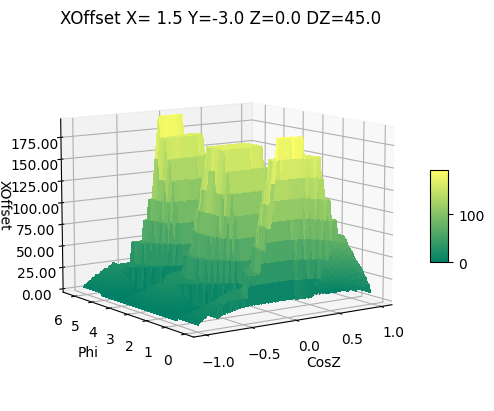

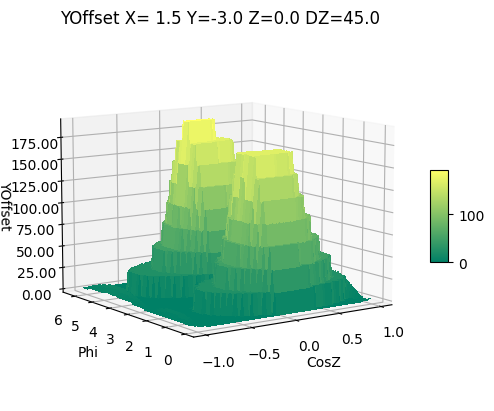

In [24]:
XX, YY = np.meshgrid(CosZBins, PhiBins)

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XX, YY, XOffset, cmap="summer",
                       linewidth=0, antialiased=False)

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Set the axis labels
#ax.set_title('XOffset')
ax.set_title("XOffset X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )

ax.set_xlabel('CosZ')
ax.set_ylabel('Phi')
ax.set_zlabel('XOffset')
#ax.set_zlim(-1.0,1.0)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.25, aspect=5)
ax.view_init(elev=10, azim=235, roll=0)

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XX, YY, YOffset, cmap="summer",
                       linewidth=0, antialiased=False)

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Set the axis labels
#ax.set_title('YOffset')
ax.set_title("YOffset X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
ax.set_xlabel('CosZ')
ax.set_ylabel('Phi')
ax.set_zlabel('YOffset')
#ax.set_zlim(-1.0,1.0)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.25, aspect=5)
ax.view_init(elev=10, azim=235, roll=0)

plt.show()

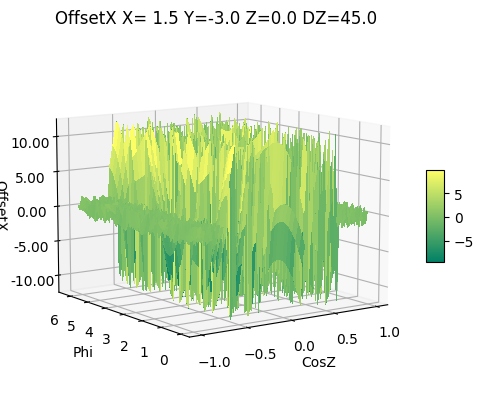

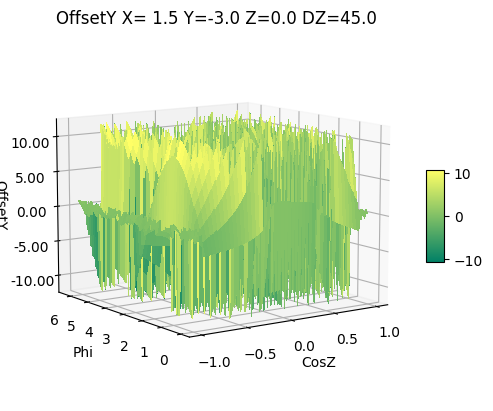

In [25]:
XX, YY = np.meshgrid(CosZBins, PhiBins)

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XX, YY, OffsetX, cmap="summer",
                       linewidth=0, antialiased=False)

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Set the axis labels
#ax.set_title('OffsetX')
ax.set_title("OffsetX X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )

ax.set_xlabel('CosZ')
ax.set_ylabel('Phi')
ax.set_zlabel('OffsetX')
#ax.set_zlim(-1.0,1.0)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.25, aspect=5)
ax.view_init(elev=10, azim=235, roll=0)

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XX, YY, OffsetY, cmap="summer",
                       linewidth=0, antialiased=False)

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Set the axis labels
#ax.set_title('OffsetY')
ax.set_title("OffsetY X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
ax.set_xlabel('CosZ')
ax.set_ylabel('Phi')
ax.set_zlabel('OffsetY')
#ax.set_zlim(-1.0,1.0)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.25, aspect=5)
ax.view_init(elev=10, azim=235, roll=0)

plt.show()

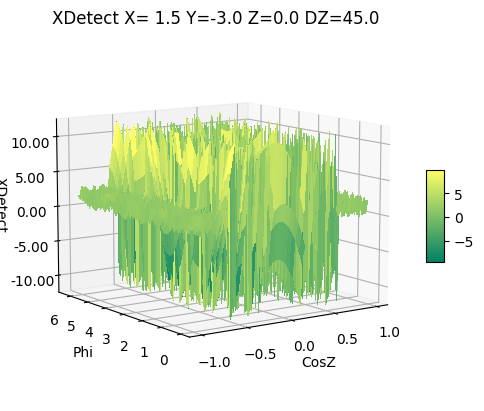

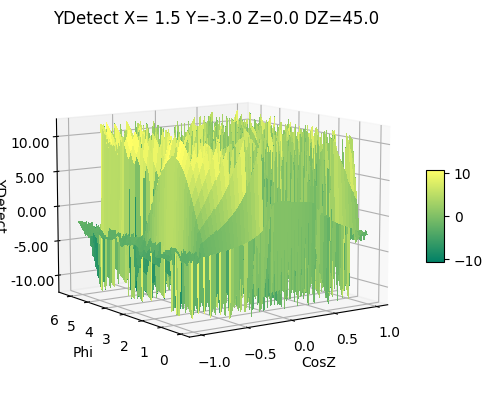

In [26]:
XX, YY = np.meshgrid(CosZBins, PhiBins)

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XX, YY, XDetect, cmap="summer",
                       linewidth=0, antialiased=False)

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Set the axis labels
#ax.set_title('XDetect')
ax.set_title("XDetect X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )

ax.set_xlabel('CosZ')
ax.set_ylabel('Phi')
ax.set_zlabel('XDetect')
#ax.set_zlim(-1.0,1.0)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.25, aspect=5)
ax.view_init(elev=10, azim=235, roll=0)

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XX, YY, YDetect, cmap="summer",
                       linewidth=0, antialiased=False)

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Set the axis labels
#ax.set_title('YDetect')
ax.set_title("YDetect X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
ax.set_xlabel('CosZ')
ax.set_ylabel('Phi')
ax.set_zlabel('YDetect')
#ax.set_zlim(-1.0,1.0)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.25, aspect=5)
ax.view_init(elev=10, azim=235, roll=0)

plt.show()

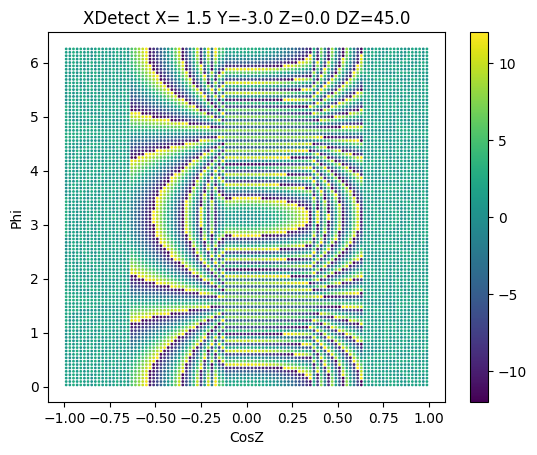

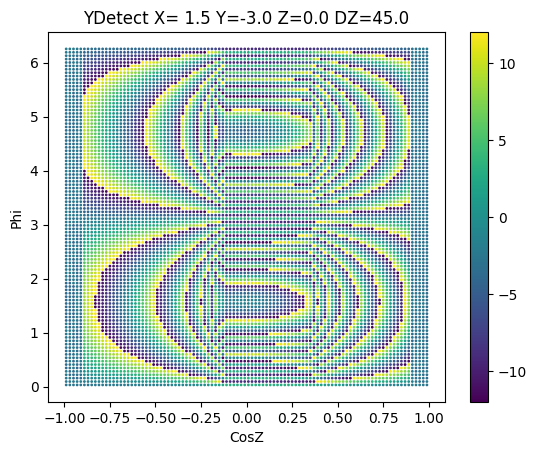

In [27]:
plt.scatter(XX,YY,c=XDetect,s=1)
#plt.title("XDetect")
plt.title("XDetect X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
plt.xlabel('CosZ')
plt.ylabel('Phi')
plt.colorbar()
plt.show()

plt.scatter(XX,YY,c=YDetect,s=1)
#plt.title("YDetect")
plt.title("YDetect X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
plt.xlabel('CosZ')
plt.ylabel('Phi')
plt.colorbar()
plt.show()

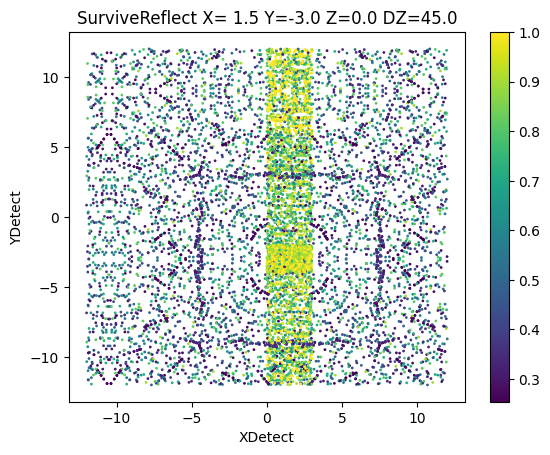

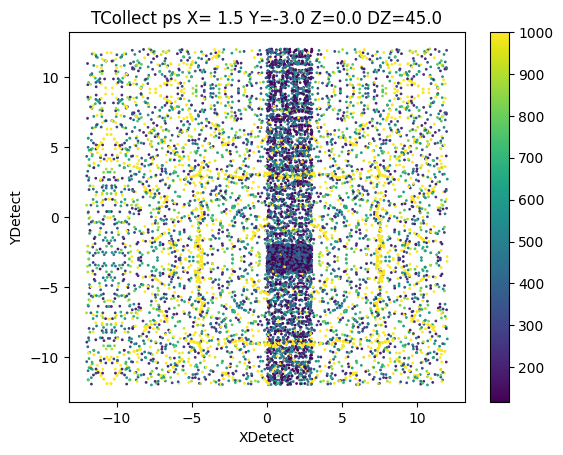

In [28]:
plt.scatter(XDetect,YDetect,c=SurviveReflect,s=1)
plt.title("SurviveReflect X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
#plt.title("SurviveReflect")
plt.xlabel('XDetect')
plt.ylabel('YDetect')
plt.colorbar()
plt.show()
plt.scatter(XDetect,YDetect,c=np.minimum(TMax,TCollect),s=1)
plt.title("TCollect ps X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
#plt.title("TCollect ps")
plt.xlabel('XDetect')
plt.ylabel('YDetect')
plt.colorbar()
plt.show()


MeanSurvive= 0.6368806223451012


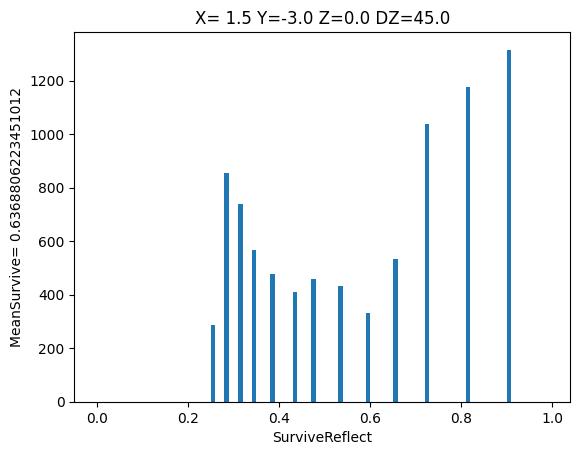

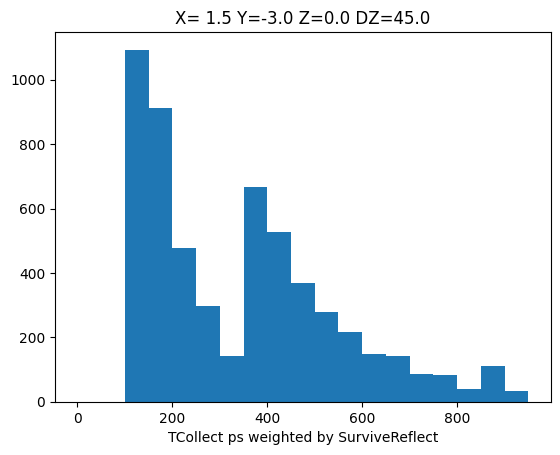

In [29]:
SurviveBins=np.arange(0,1.0001,0.01)
FlatSurvive=SurviveReflect.flatten()
plt.hist(SurviveReflect.flatten(), bins=np.arange(0,1.,0.01))
print("MeanSurvive= " + str(SurviveReflect.mean()))
plt.title("X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
plt.ylabel("MeanSurvive= " + str(SurviveReflect.mean()))
plt.xlabel('SurviveReflect')
plt.show()
TCollectBins=np.arange(0,TMax,50)
plt.hist(TCollect.flatten(), bins=TCollectBins, weights=SurviveReflect.flatten())
plt.title("X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
plt.xlabel("TCollect ps weighted by SurviveReflect")
plt.show()


https://numpy.org/doc/stable/reference/generated/numpy.histogram2d.html

and

https://stackoverflow.com/questions/8437788/how-to-correctly-generate-a-3d-histogram

ic| XDetect.flatten().shape: (10000,)
ic| YDetect.flatten().shape: (10000,)
ic| Detect2Dbins: (array([-12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.]),
                   array([-12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,
                          10.,  12.]))
ic| DetectH.shape: (12, 8)
<ipython-input-30-9f110365cfda>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!


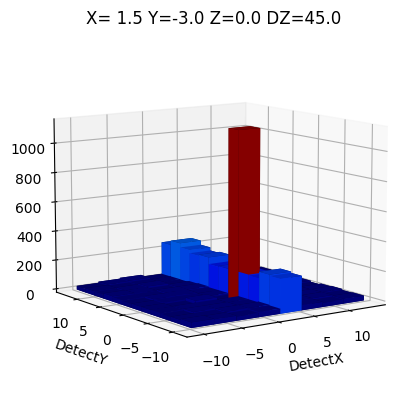

In [30]:
#!pip install icecream
#from icecream import ic
ic(XDetect.flatten().shape)
ic(YDetect.flatten().shape)
xedges=np.arange(-DX/2,dX+DX/2,dX)
#yedges=np.arange(-DY/2,dX+DY/2,dX)
yedges=np.arange(-DY/2,dY+DY/2,dY)
Detect2Dbins=(xedges,yedges)
ic(Detect2Dbins)
DetectH, XDetectEdges, YDetectEdges = np.histogram2d(XDetect.flatten(),YDetect.flatten(),bins=Detect2Dbins,weights=SurviveReflect.flatten())
DetectH=np.transpose(DetectH)
ic(DetectH.shape)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#ax = fig.add_subplot(132, title='DetectH', aspect='equal')
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

Hdx = xedges [1] - xedges [0]
Hdy = yedges [1] - yedges [0]
Hdz = DetectH.flatten()

from matplotlib import cm
cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
#plt.colormaps['jet']
max_height = np.max(Hdz)   # get range of colorbars so we can normalize
min_height = np.min(Hdz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in Hdz]


ax.bar3d(xpos, ypos, zpos, Hdx, Hdy, Hdz, color=rgba, zsort='average')
plt.title("X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
plt.xlabel("DetectX")
plt.ylabel("DetectY")
ax.view_init(elev=10, azim=235, roll=0)
#plt.savefig("Your_title_goes_here")
plt.show()

ic| XDetect.flatten().shape: (10000,)
ic| TCollect.flatten().shape: (10000,)
ic| Detect2Dbins: (array([-12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.]),
                   array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.,
                         550., 600., 650., 700., 750., 800., 850., 900., 950.]))
ic| DetectH.shape: (19, 8)


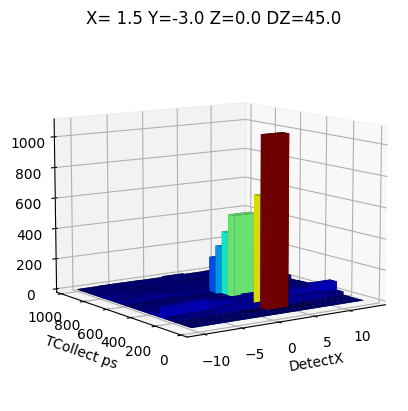

In [31]:
ic(XDetect.flatten().shape)
ic(TCollect.flatten().shape)
xedges=np.arange(-DX/2,dX+DX/2,dX)
yedges=np.arange(0,TMax,50)
Detect2Dbins=(xedges,yedges)
ic(Detect2Dbins)
DetectH, XDetectEdges, YDetectEdges = np.histogram2d(XDetect.flatten(),TCollect.flatten(),bins=Detect2Dbins,weights=SurviveReflect.flatten())
DetectH=np.transpose(DetectH)
ic(DetectH.shape)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#ax = fig.add_subplot(132, title='DetectH', aspect='equal')
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

Hdx = xedges [1] - xedges [0]
Hdy = yedges [1] - yedges [0]
Hdz = DetectH.flatten()

from matplotlib import cm
#cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
plt.colormaps['jet']
max_height = np.max(Hdz)   # get range of colorbars so we can normalize
min_height = np.min(Hdz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in Hdz]


ax.bar3d(xpos, ypos, zpos, Hdx, Hdy, Hdz, color=rgba, zsort='average')
plt.title("X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
plt.xlabel("DetectX")
plt.ylabel("TCollect ps")
ax.view_init(elev=10, azim=235, roll=0)
#plt.savefig("Your_title_goes_here")
plt.show()

ic| NX: 8
ic| NY: 12
ic| NXY: 96
ic| NT: 20
ic| DetectX.max(): 7.0
ic| DetectY.max(): 11.0
ic| DetectXY.max(): 95.0
ic| np.max(DetectH_XYvT.flatten()): 524.0
ic| DetectH_XYvT.shape: (20, 96)


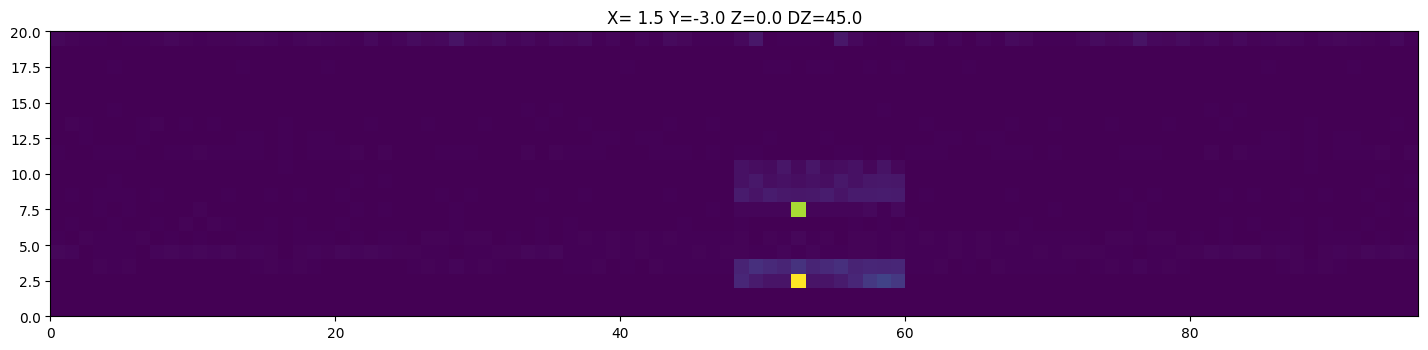

ic| EventData.shape: (8, 12, 20)
ic| EventData[:,5,2]: array([ 0.        , 61.22      ,  1.3122    , 39.4722    ,  0.        ,
                              0.9565938 ,  0.        ,  0.62762119])


array([ 0.        , 61.22      ,  1.3122    , 39.4722    ,  0.        ,
        0.9565938 ,  0.        ,  0.62762119])

In [32]:
DetectX=np.floor_divide(XDetect.flatten()+(DX/2.),dX)
DetectY=np.floor_divide(YDetect.flatten()+(DY/2.),dY)
NX=int(DX/dX)
ic(NX)
NY=int(DY/dY)
ic(NY)
NXY=NX*NY
ic(NXY)
NT=int(TMax/50)
ic(NT)

ic(DetectX.max())
ic(DetectY.max())
DetectXY=NY*DetectX +DetectY
ic(DetectXY.max())
DetectT=np.floor_divide(TCollect.flatten(),50)
xedges=np.arange(0,NXY+1,1)
yedges=np.arange(0,NT+1,1)
Detect2Dbins=(xedges,yedges)
DetectH_XYvT,  XYDetectEdges, TDetectEdges = np.histogram2d(DetectXY,DetectT,bins=Detect2Dbins,weights=SurviveReflect.flatten())
ic(np.max(DetectH_XYvT.flatten()))

fig = plt.figure(figsize=(60, 30))
DetectH_XYvT=np.transpose(DetectH_XYvT)
ic(DetectH_XYvT.shape)

ThisTitle="X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ)

ax = fig.add_subplot(132, title=ThisTitle,
        aspect='equal')
HX, HY = np.meshgrid(xedges, yedges)
ax.pcolormesh(HX, HY, DetectH_XYvT)
plt.show()

EventData=np.reshape(DetectH_XYvT,(NX,NY,NT))
ic(EventData.shape)
ic(EventData[:,5,2])